## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

MY ANSWERS

## 1 -----
  ###  Classification is when you are predicting a certain categorical outcome while regression is when your prediction is numeric
  ###  K-means is an example of a model that utilizes classification, sepreating data into different clusters(categories), while a linear regression is a model that utilizes regression, making prediction using a best fit equation

## 2 -----
  ###  A confusion table is a cross-tabulation table of a models predicted values as well as it's actual values. It allows us to see how far or close 
  ###  the predicted values are to the actual values, providing us reference to see whether a model preforms well.

## 3 -----
  ###  Sum of squared error sums the distance each actual data point is from its predicted values squared, which gives us insight to how accurate model preforms
  ###  by telling us the variance.


## 4 -----
### Overfitting is when your model is too conformed to your training data making it unrealistically precise for it to be useful for prediction on data outside of the model while underfitting happens when your model is too simple or abstracted to make any meaningful explanation of the data's trend. Both should be attempted to be as small as possible. 

## 5 -----
  ###  Splitting the data into training and model sets allows for us to test the accuracy of our model by giving utilizing the "uncertain" part of the data and
    using that to represent the real uncertainty of future predictions. We can see how well our model from the training data preforms with the testing data by calculating the sum of sqaured error to see how far they deviate from eachother, and compare those deviations from models where k is greater or smaller
    in size of the neigbors we want to utilize. Which ever model returns the smallest sse is would be the the model with the best performance.


6 -----
  ##  Doing classification by predicting a single class label is easier for the user to interpret and ultilze but it doesn’t give insight to how confident the model actually is. When using predicting probabilities in classificationg, more information is given which is better for decisions, but it's weakness is that it is more difficult to interpret and it takes more computational power. Using probability predictions would be better for making important decisions, while using the single labels work well for simple tasks.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#1


data = "/Users/iankariuki/UVADS/Machine-Learning1/hw/knn/data/USA_cars_datasets.csv"

df = pd.read_csv(data)

df = df.loc[:, ["price","year","mileage"]]
df.head()

print("there are",df.isna().sum().sum(),"values in the dataset under price, year, and model that are NA")
df.shape


there are 0 values in the dataset under price, year, and model that are NA


(2499, 3)

In [48]:
#2

from sklearn.neighbors import KNeighborsRegressor 

y = df['price'] 
X = df.loc[:,['year','mileage']] 
print("Before minmax\n",X.head())
print(X.describe())

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

X = X.apply(maxmin)
print("\n\nAfter minmax\n",X.head())
print(X.describe())

Before minmax
    year  mileage
0  2008   274117
1  2011   190552
2  2018    39590
3  2014    64146
4  2018     6654
              year       mileage
count  2499.000000  2.499000e+03
mean   2016.714286  5.229869e+04
std       3.442656  5.970552e+04
min    1973.000000  0.000000e+00
25%    2016.000000  2.146650e+04
50%    2018.000000  3.536500e+04
75%    2019.000000  6.347250e+04
max    2020.000000  1.017936e+06


After minmax
        year   mileage
0  0.744681  0.269287
1  0.808511  0.187194
2  0.957447  0.038892
3  0.872340  0.063016
4  0.957447  0.006537
              year      mileage
count  2499.000000  2499.000000
mean      0.930091     0.051377
std       0.073248     0.058654
min       0.000000     0.000000
25%       0.914894     0.021088
50%       0.957447     0.034742
75%       0.978723     0.062354
max       1.000000     1.000000


In [49]:
#3

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=65) 
                                                    

In [86]:
#4 Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

k_bar = [3,10,25,50,100,300]

SSE = [] # We'll store the SSE here 
SSE_on_train = []
for k in k_bar:
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE.append(np.sum( (y_test-y_hat)**2 )) # Save the computed SSE for test set
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_on_train.append( np.sum( (y_train-y_hat)**2 ) ) # Save the computed SSE

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.argmin(SSE)
k_star = k_bar[min_index]
print(k_star)


50


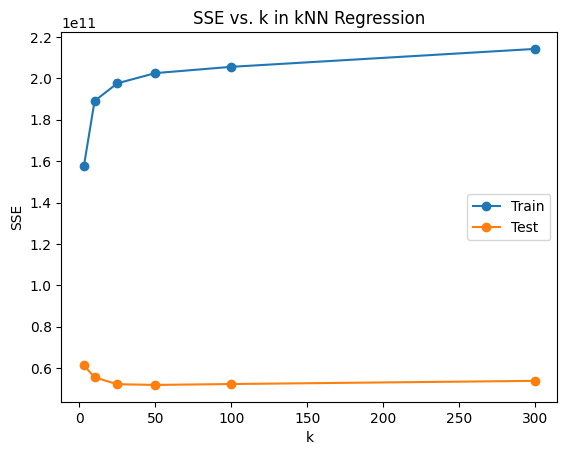

In [92]:
plt.plot(k_bar, SSE_on_train, label='Train', marker = "o")  
plt.plot(k_bar, SSE, label='Test', marker="o")  
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='center right')
plt.title("SSE vs. k in kNN Regression")
plt.show()

In [88]:
print("The optimal value of k that returns the smallest SSE for the training set is", k_star)


The optimal value of k that returns the smallest sse for the training set is 50


## 6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

### Answer: - For smaller values of k, the plot showed that there was much larger variance in the error of the predicted values meaning that it is underfit while for the higher values of k, there was less variance from the training model, causing the prediction to be too closely fit to the training data which lead to the model performing worse on the testing data. The intermidiate values like 25,50 had a good balance of generalizing the training data allowing the testing data results to be more accurate.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data. 

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data. 
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE. 
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.